In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [0]:
# Code to read csv file into Colaboratory:

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = "https://drive.google.com/open?id=1rVMf-EsPvmEzXaue6Owzgc77RLxL6ZMe"



In [0]:
#creating dataframe from link1
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Admission_Predict.csv')  
data = pd.read_csv('Admission_Predict.csv')

In [411]:
Data = data.select_dtypes(include=["int32","int64","float32","float64"])
Data = Data.dropna(axis=0)


Train = Data[:int(0.7*len(Data))]
Test = Data[int(0.7*len(Data)):]

Y = Train["Chance of Admit "]
Train = Train.drop(['Chance of Admit ','Research','Serial No.'],axis = 1).copy()
Y.shape

(280,)

In [412]:
Train.shape
#Train.columns

(280, 6)

In [0]:
X = Train
SelectedFeatures = X.columns.values.tolist()

X = np.array(X)

for i in range(len(X.T)):
  X.T[i] = X.T[i] + 1

In [0]:
X = pd.DataFrame(X)

In [415]:
X.shape

(280, 6)

In [0]:
TestY = Test["Chance of Admit "]
TestX = Test.drop(["Chance of Admit "],axis=1).copy()

TestX = np.array(TestX)

for i in range(len(TestX.T)):
  TestX.T[i] = TestX.T[i] + 1

In [0]:
# print ("ytest",TestY)

# print ("xtest",TestX)

TestX = pd.DataFrame(TestX)

In [418]:

Y = np.array(Y)
Y.shape
Y = np.reshape(Y,[len(Y),1])
TestY = np.array(TestY)
TestY = np.reshape(TestY,[len(TestY),1])
m = np.random.randn(1,len(X.T))
print(X.shape,Y.shape,m.shape)


(280, 6) (280, 1) (1, 6)


In [0]:
def line(m,X):
  return np.dot(X,m.T)

In [420]:
line(m,X).shape

(280, 1)

In [0]:
def cost(m,X,Y):
  return np.mean((line(m,X) - Y)**2)

In [422]:
cost(m,X,Y)

3300.231256592978

In [0]:
def derivative(m,X,Y):
  return np.dot((2*(line(m,X) - Y)).T,X)

In [424]:
derivative(m,X,Y).shape

(1, 6)

error:  0.1246805719131269 iteration:  0
error:  0.015230507603166767 iteration:  10
error:  0.01522579350096055 iteration:  20
error:  0.015221088702998025 iteration:  30
error:  0.015216388674784621 iteration:  40
error:  0.01521169341094759 iteration:  50
error:  0.015207002906120464 iteration:  60
error:  0.015202317154942939 iteration:  70
error:  0.015197636152060831 iteration:  80
error:  0.015192959892126063 iteration:  90
error:  0.015188288369796714 iteration:  100
error:  0.015183621579736946 iteration:  110
error:  0.01517895951661702 iteration:  120
error:  0.015174302175113313 iteration:  130
error:  0.015169649549908277 iteration:  140
error:  0.01516500163569044 iteration:  150
error:  0.015160358427154413 iteration:  160
error:  0.015155719919000884 iteration:  170
error:  0.015151086105936578 iteration:  180
error:  0.015146456982674295 iteration:  190
error:  0.015141832543932872 iteration:  200
error:  0.015137212784437198 iteration:  210
error:  0.01513259769891815

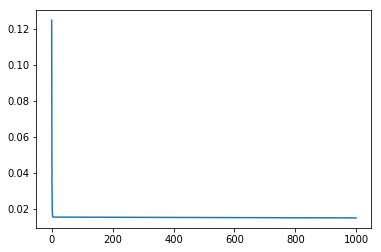

In [425]:
# Gradient descent
LR = 0.000000009
m1 = np.random.randn(1,len(X.T))/10000

error = []
# def gradient_descent(m1,X,Y,Iters,LR):
for i in range(1000):
  m1 = m1 - LR*derivative(m1,X,Y)
  error.append(cost(m1,X,Y))
  if(i%10==0):
    print("error: ",error[i],"iteration: ",i)
#     c = c - derivative_c(m1,c,X,Y)
import matplotlib.pyplot as plt
plt.plot(error)

In [426]:
predictions = line(m,X)
predictions
error = cost(m1,X,Y)
error
acc = 100 - (error/np.mean(Y**2))*100
# # print(acc.shape)
print("Accuracy: ",acc,"%")

Accuracy:  97.32215963576806 %
